In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from windrose import WindroseAxes

In [2]:
df = pd.read_csv('data/weather_synop.csv')

# ploting wind-rose diagrams by seasons of each year

In [3]:
'''
There is a dataframe containing various measurements taken at a synoptic station between 1990 and 2004 (see https://glossary.ametsoc.org/wiki/Synoptic_station).
These measurements include the "date of report," "wind speed," "wind direction," "dry temperature," "QNH pressure," and others.
I have chosen to plot wind-rose diagrams using the wind speed and wind direction data (https://en.wikipedia.org/wiki/Wind_rose).
I have created these diagrams for each season of the year using the windrose library. For further details, please refer to https://hatarilabs.com/ih-en/how-to-make-a-wind-rose-with-python-tutorial.
Note that the data for 1998 is missing.
'''
# select necessary columns
selected_columns = ['date', 'dd', 'ff']
df_wind = df[selected_columns]
# rename columns' name for more clarity
df_wind = df_wind.rename(columns={'dd':'wind_direction', 'ff':'wind_speed'})

In [4]:
df_wind.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40814 entries, 0 to 40813
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            40814 non-null  object 
 1   wind_direction  30720 non-null  float64
 2   wind_speed      30720 non-null  float64
dtypes: float64(2), object(1)
memory usage: 956.7+ KB


In [5]:
# delete none values
df_wind.dropna(how='any', inplace=True)

In [6]:
#Define a function to determine the season of each row based on the "date" column, and then apply the function to the dataframe. 

def season_finder(date):
    month = int(date.split('-')[1])
    if month in range(3, 6):
        return 'spring'
    elif month in range(6, 9):
        return "summer"
    elif month in range(9, 12):
        return 'fall'
    else:
        return 'winter'
    
    
# Apply the function to create a new column name: season
df_wind['season'] = df['date'].apply(season_finder)

In [7]:
# now we grab all rows from year 1990
df_wind['date'] = pd.to_datetime(df['date'])

In [8]:
year = 1990
df_year = df_wind[df_wind['date'].dt.year ==year]

<Figure size 600x600 with 0 Axes>

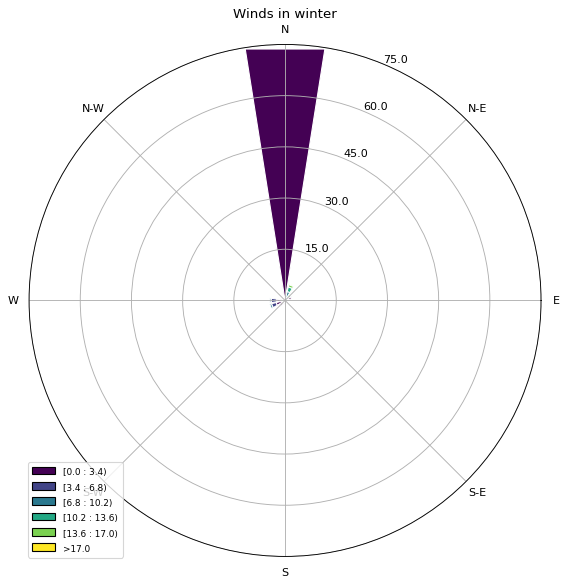

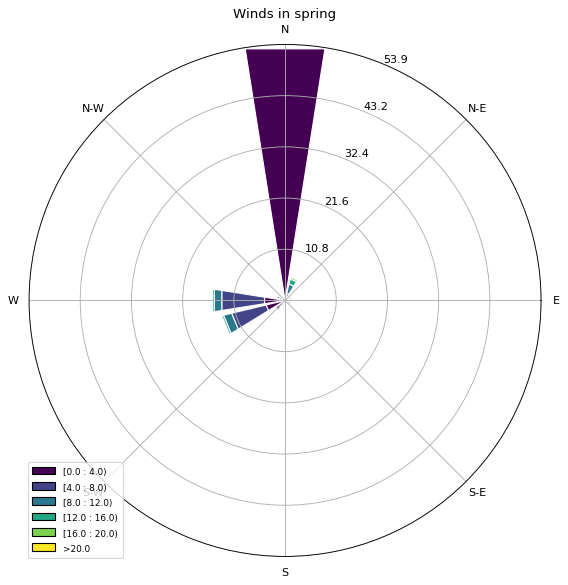

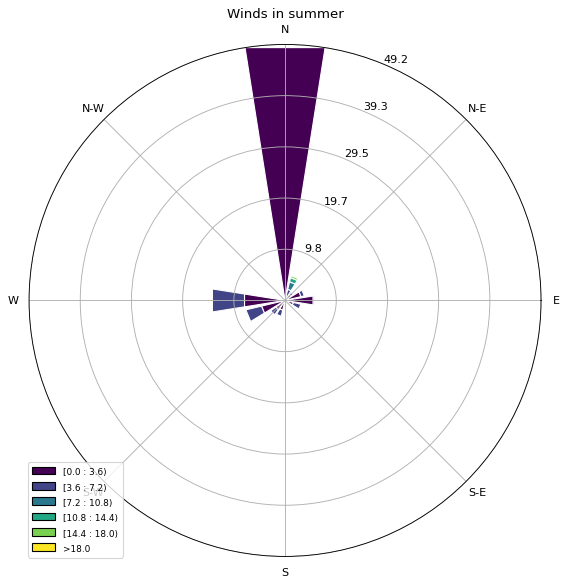

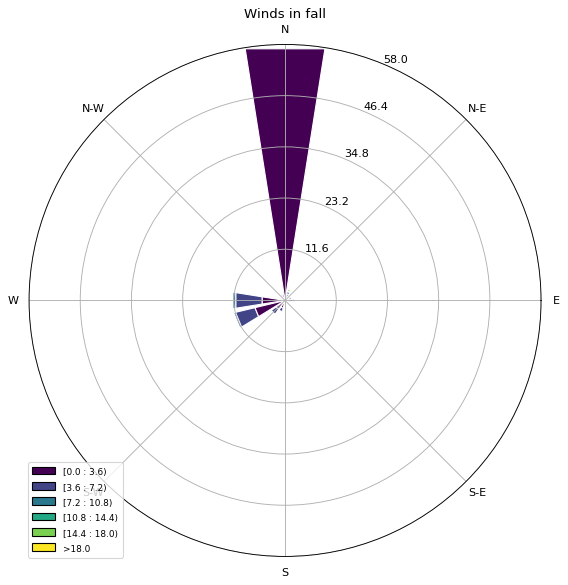

In [9]:
seasons = ['winter', 'spring', 'summer', 'fall']
plt.figure(dpi=200, figsize=(3,3))
for season in seasons:

    ax = WindroseAxes.from_ax()
    ax.bar(df_year[df_year['season'] == season]['wind_direction'],
           df_year[df_year['season'] == season]['wind_speed'], normed=True,
          opening=0.8, edgecolor='white')
    ax.set_legend()
    plt.title(f'Winds in {season}')
    plt.show()

<Figure size 600x600 with 0 Axes>

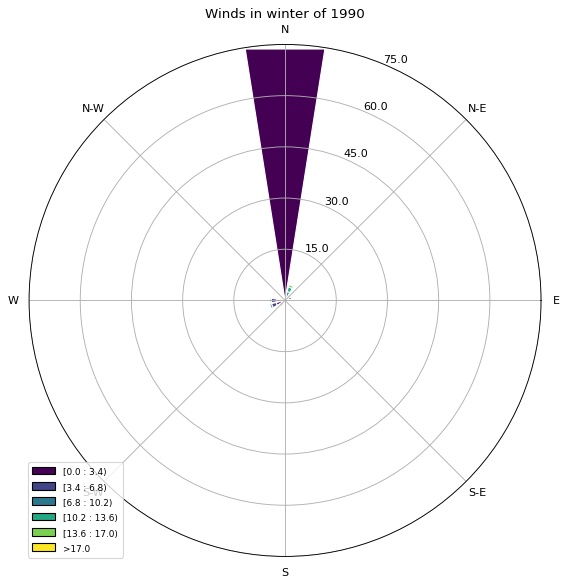

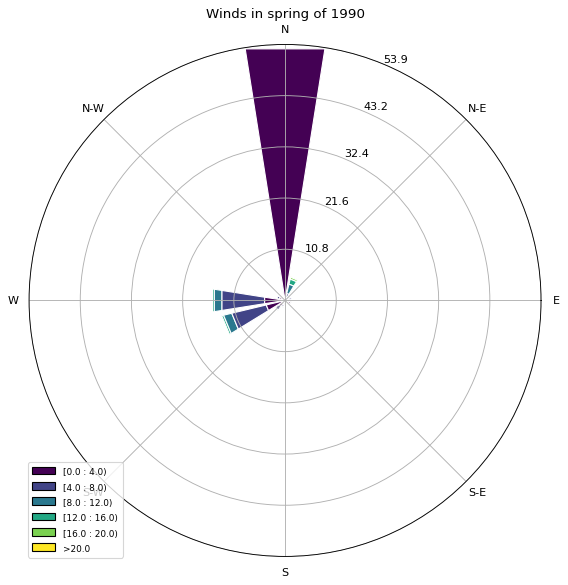

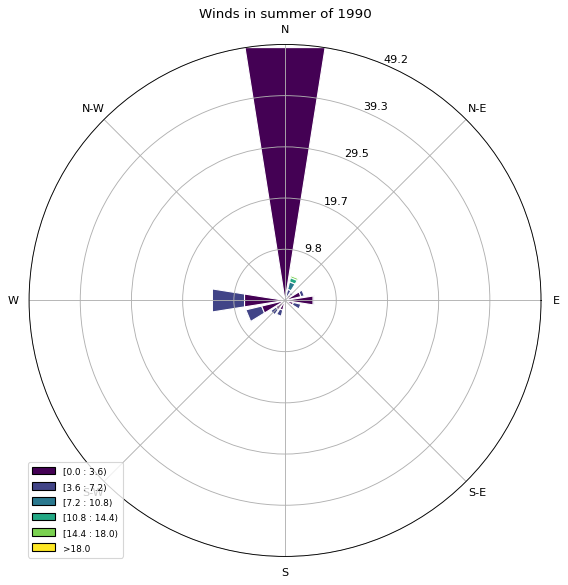

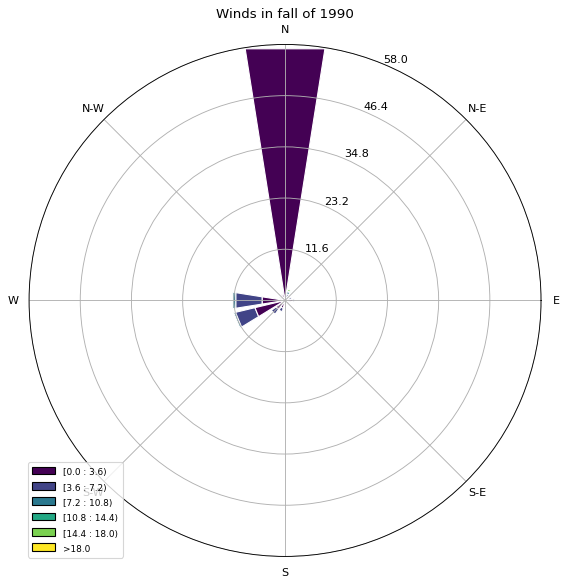

<Figure size 600x600 with 0 Axes>

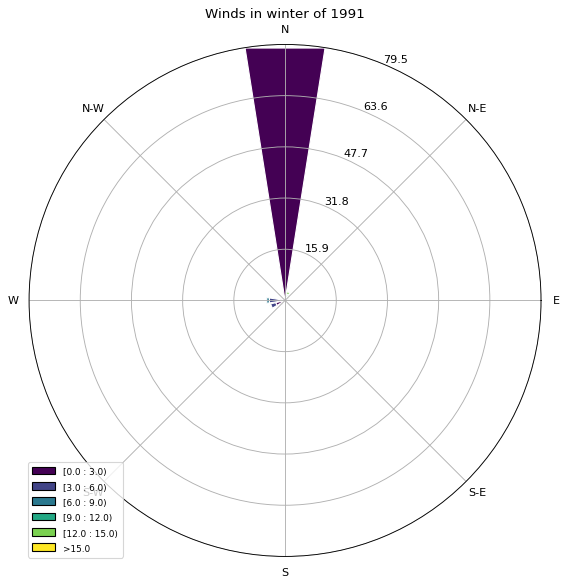

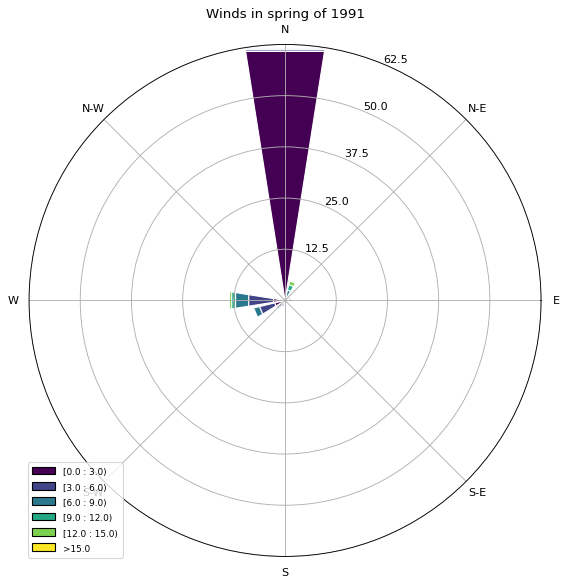

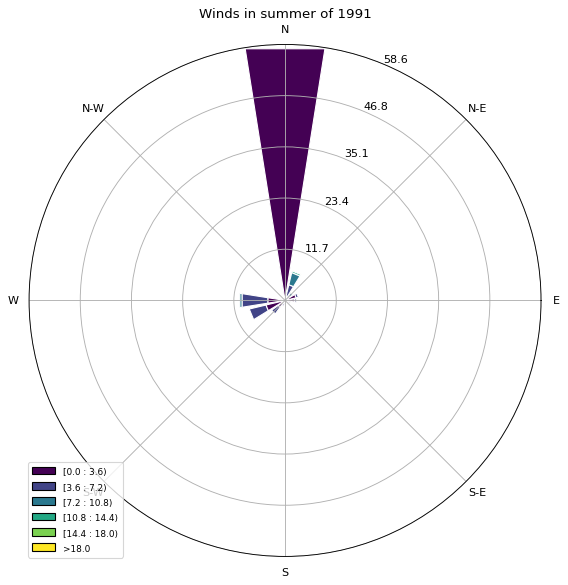

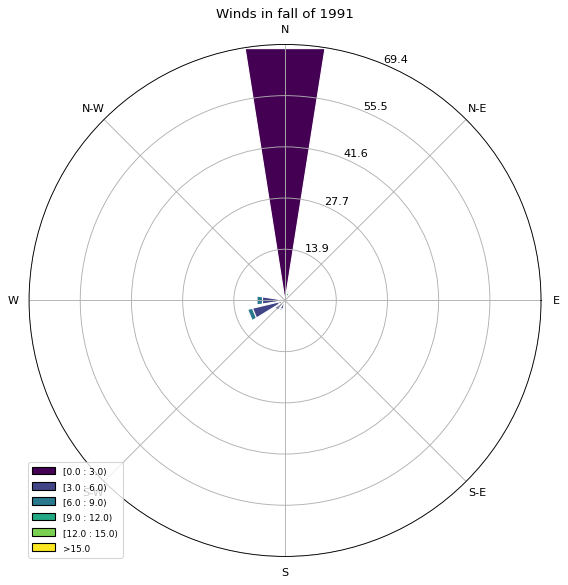

<Figure size 600x600 with 0 Axes>

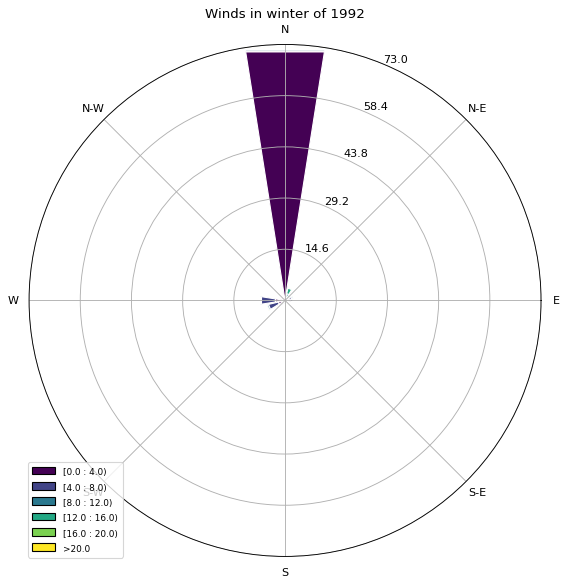

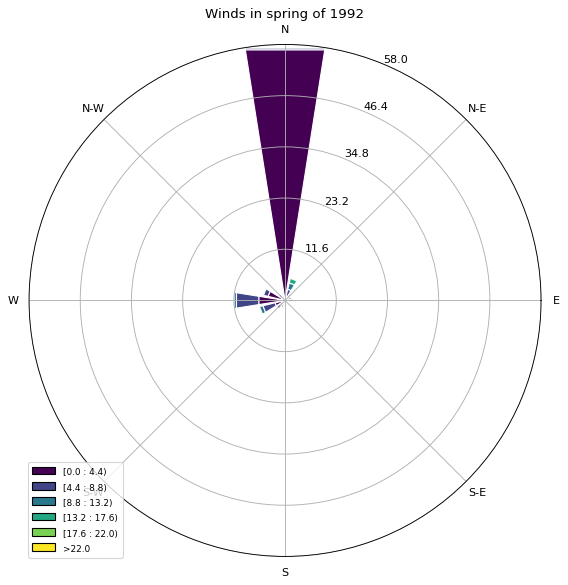

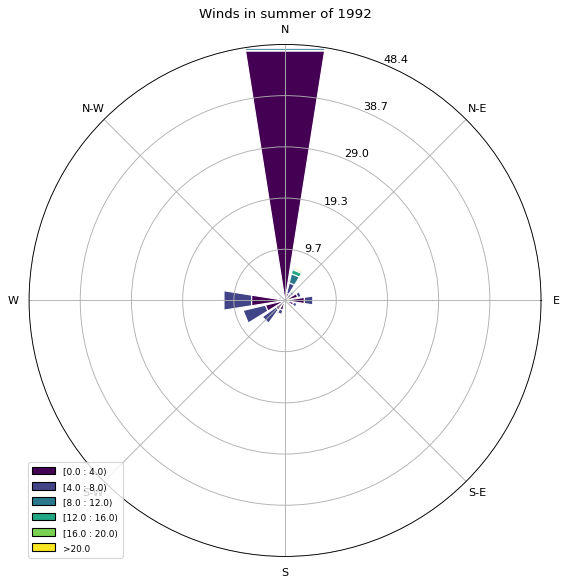

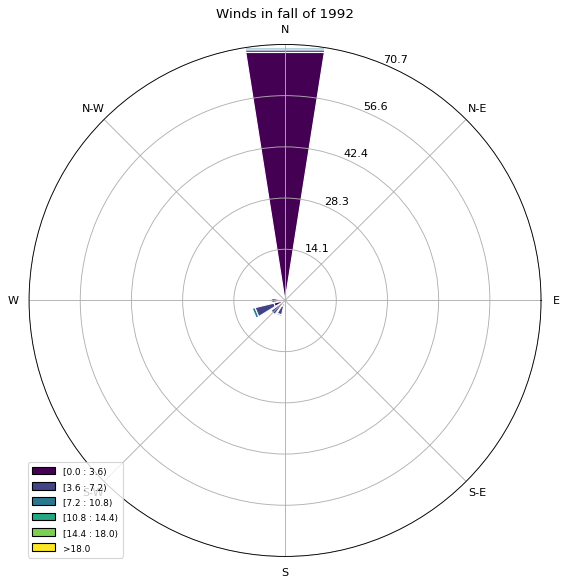

<Figure size 600x600 with 0 Axes>

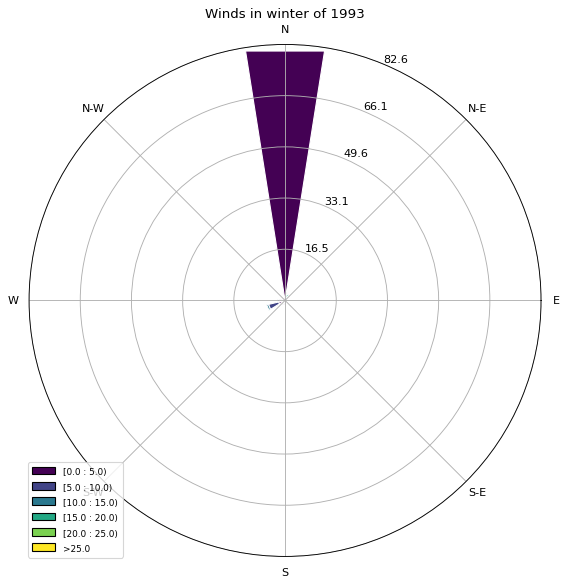

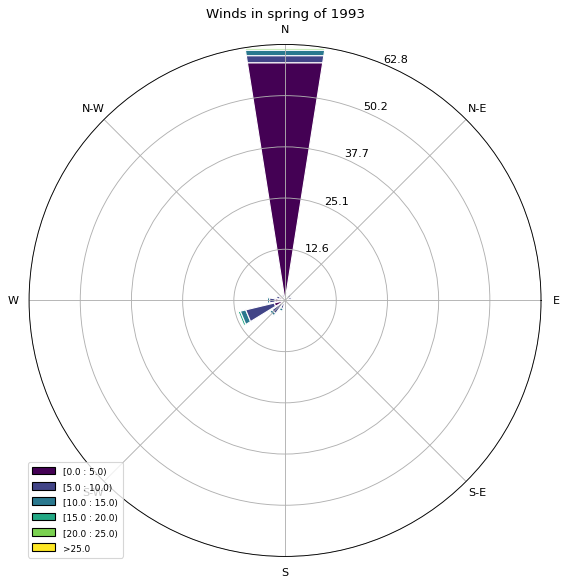

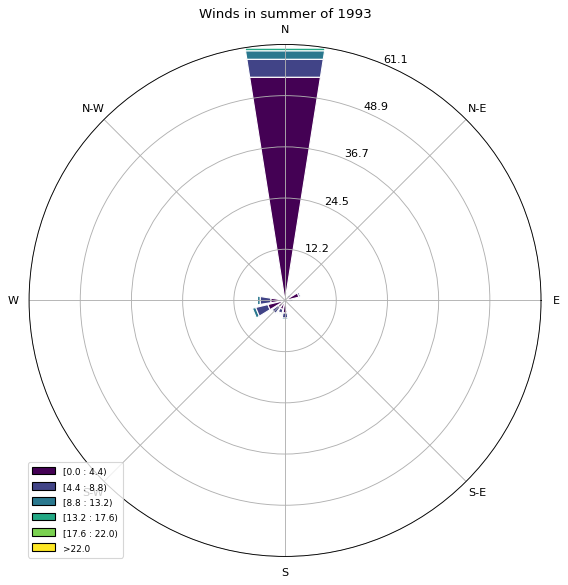

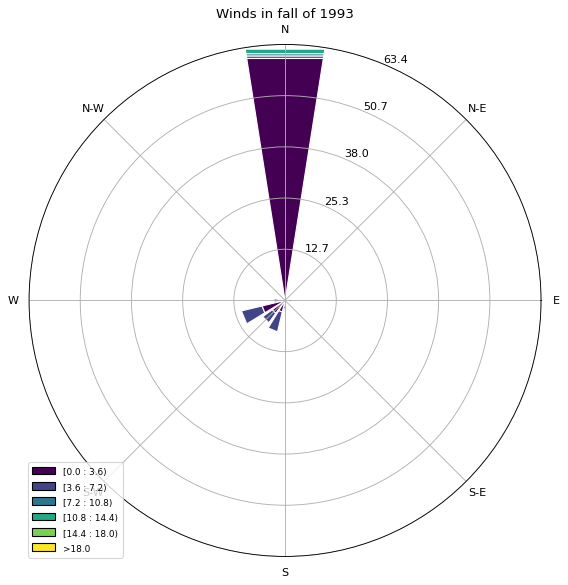

<Figure size 600x600 with 0 Axes>

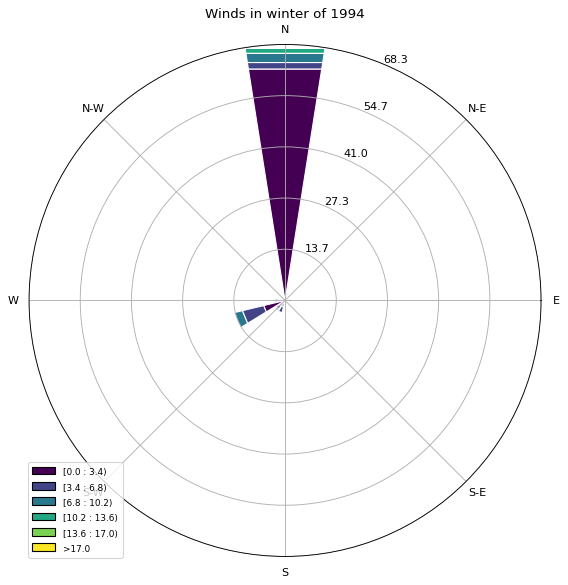

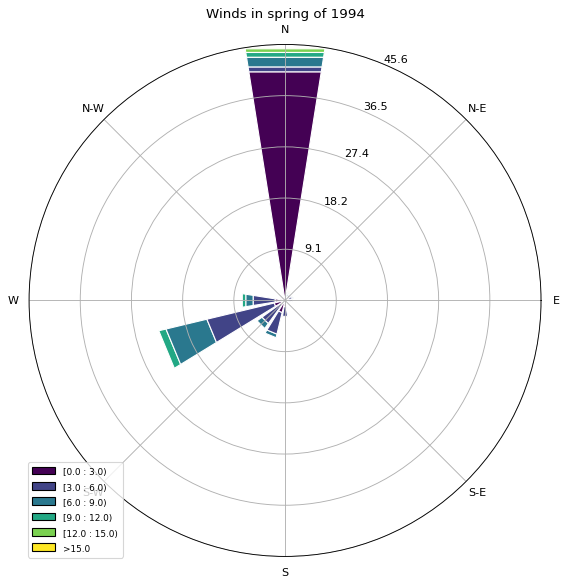

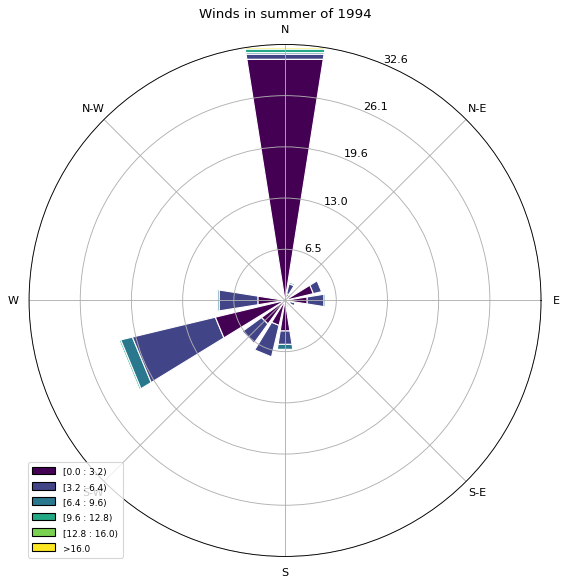

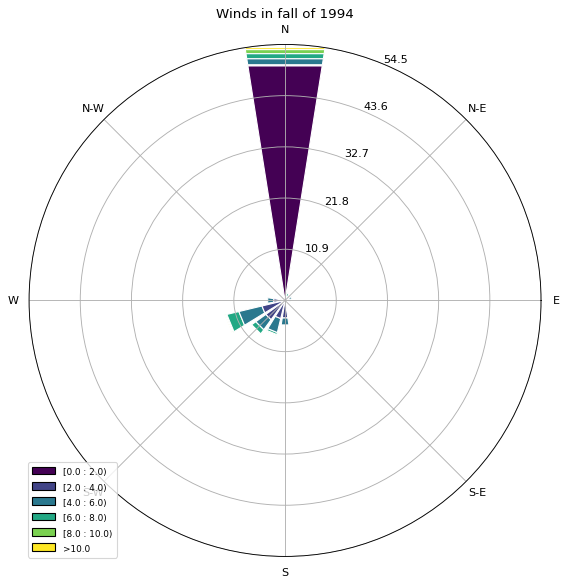

<Figure size 600x600 with 0 Axes>

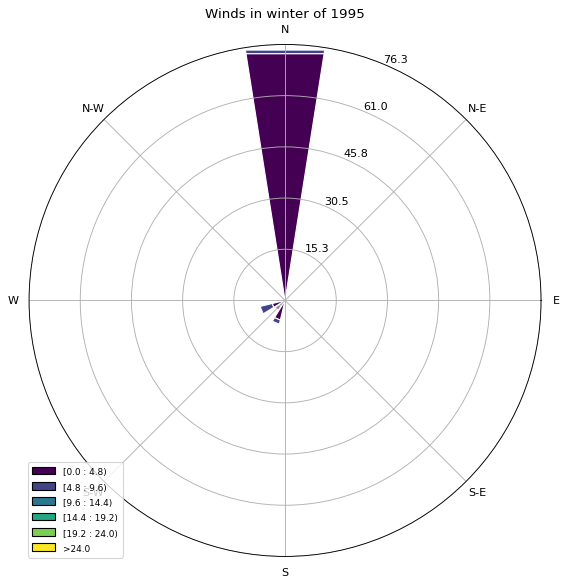

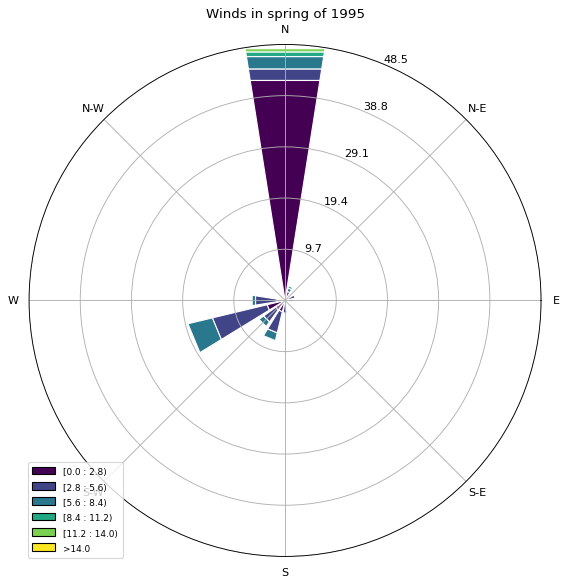

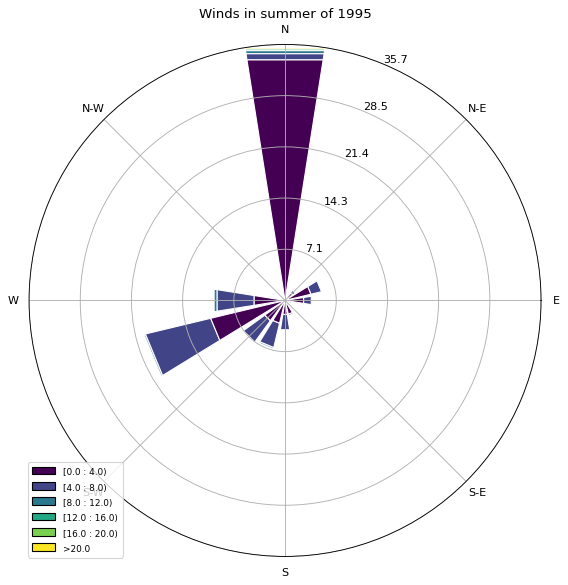

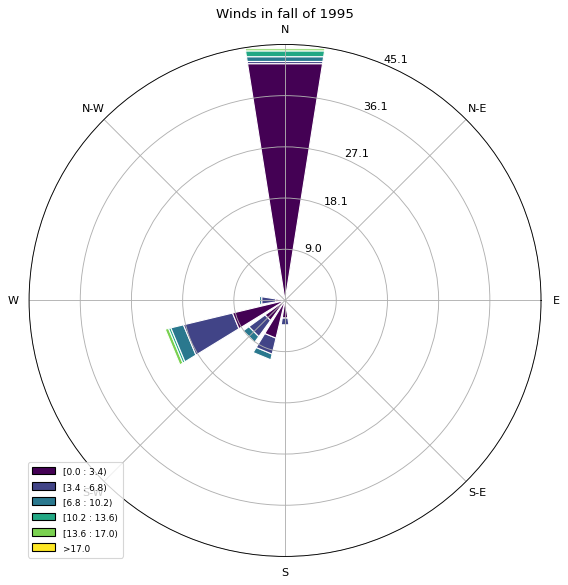

<Figure size 600x600 with 0 Axes>

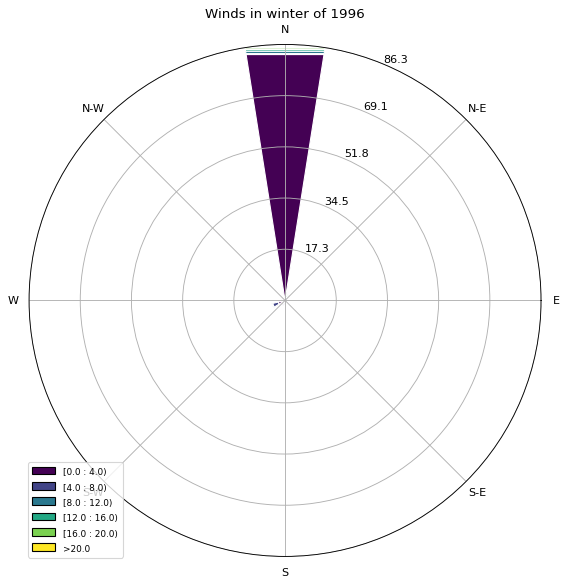

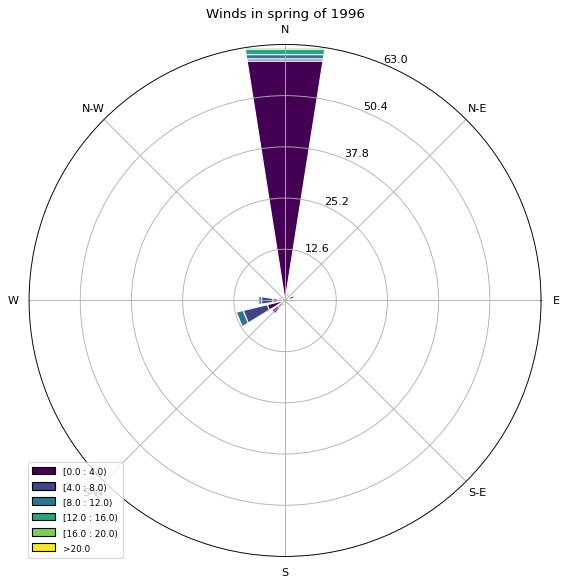

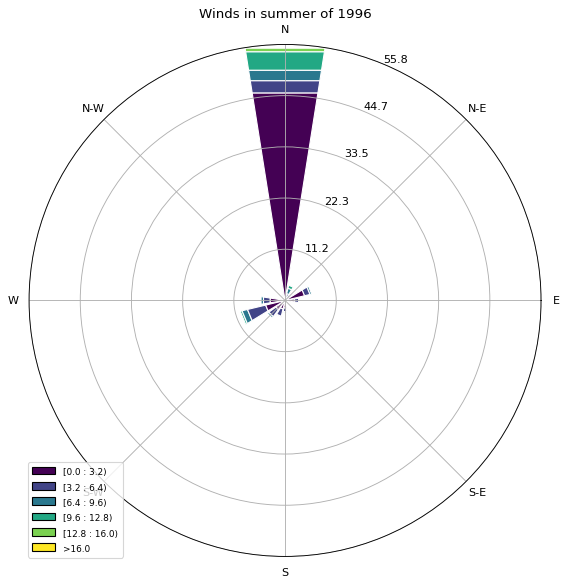

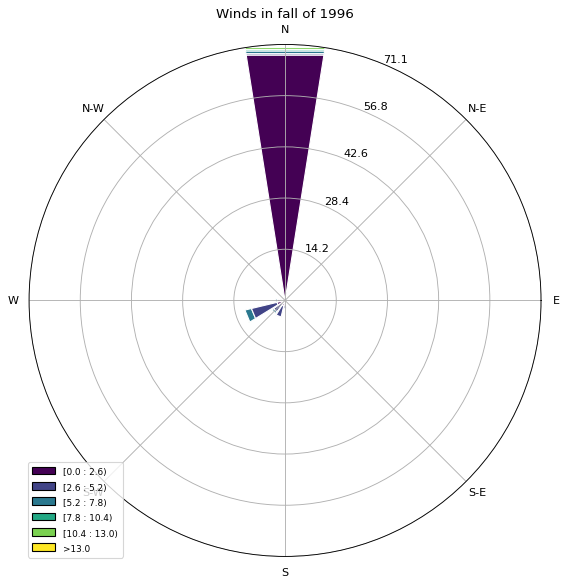

<Figure size 600x600 with 0 Axes>

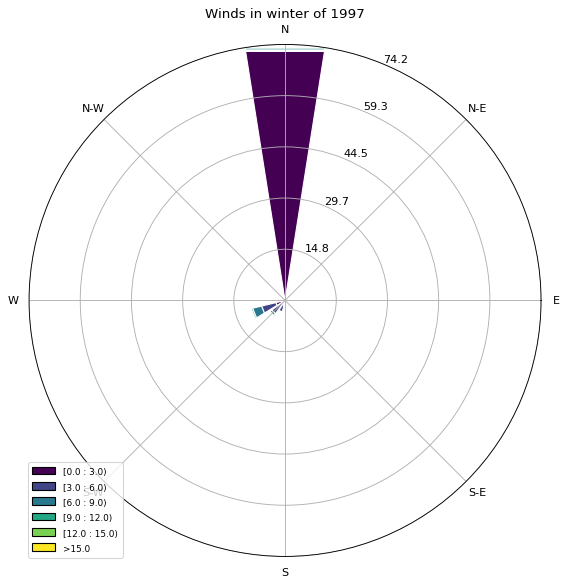

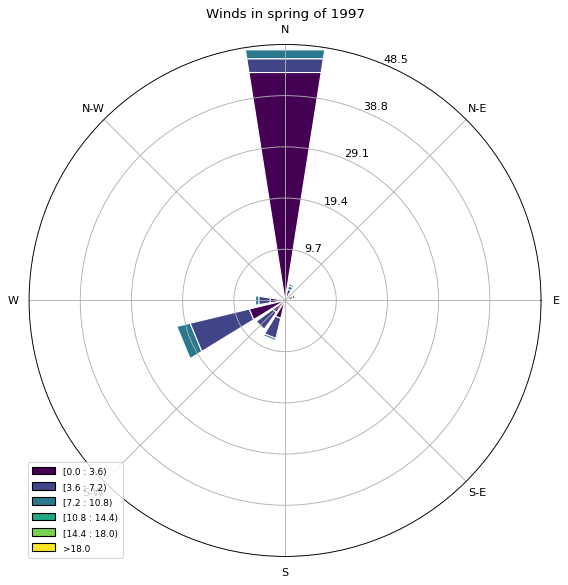

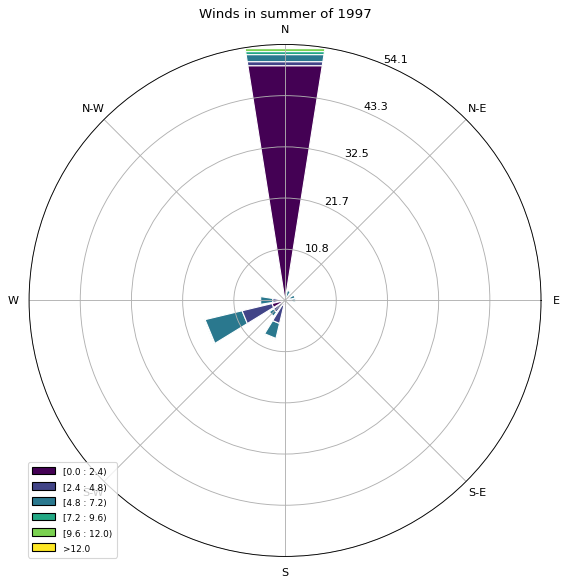

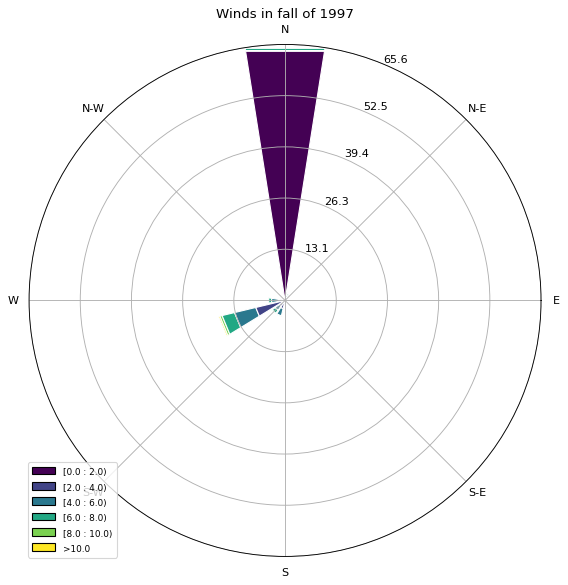

<Figure size 600x600 with 0 Axes>

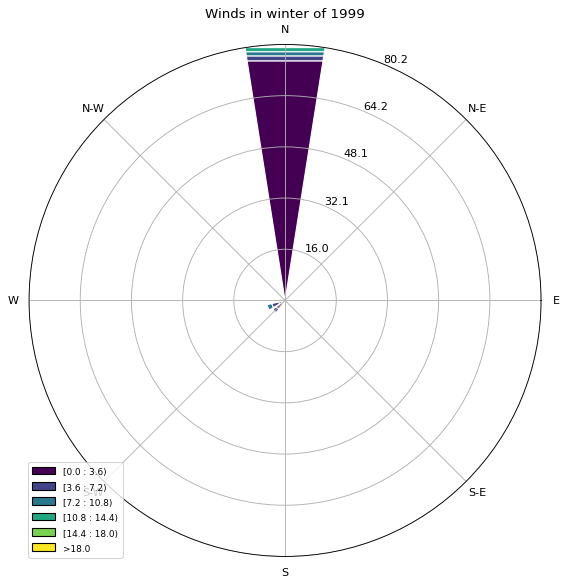

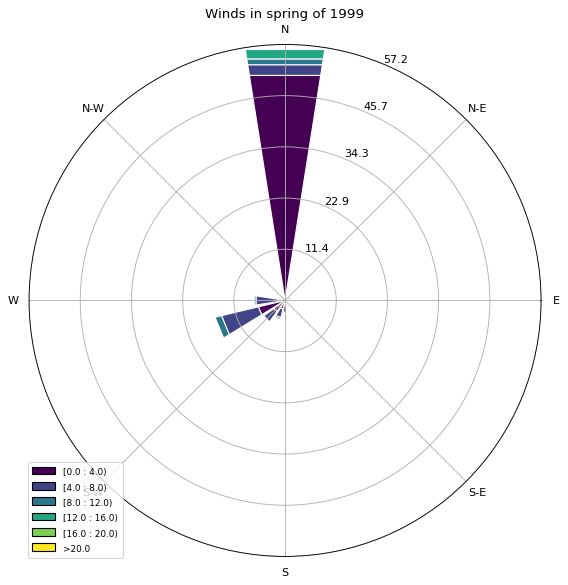

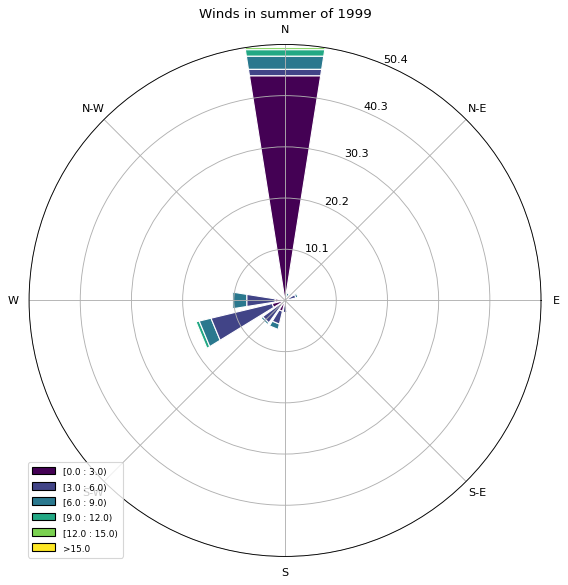

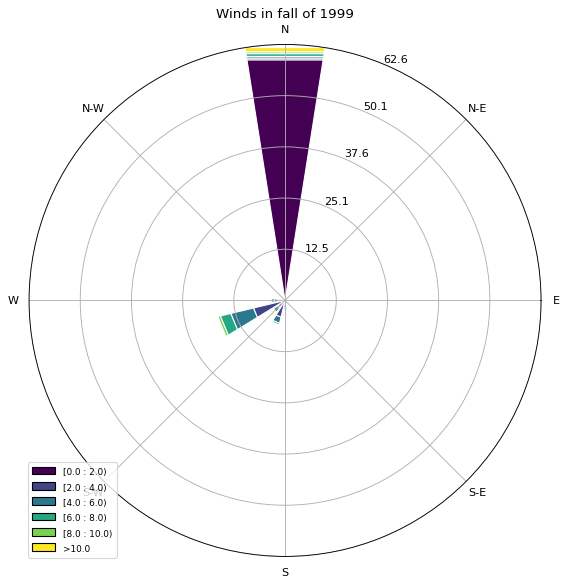

<Figure size 600x600 with 0 Axes>

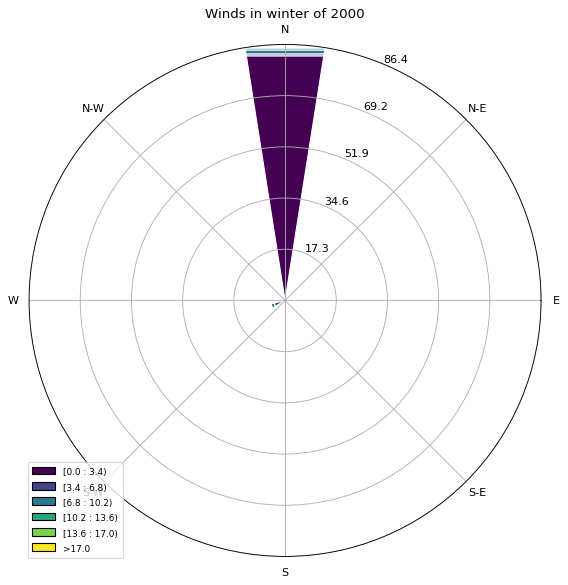

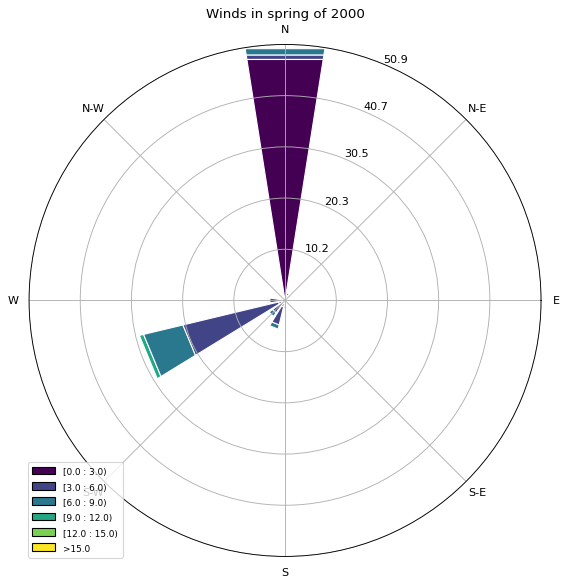

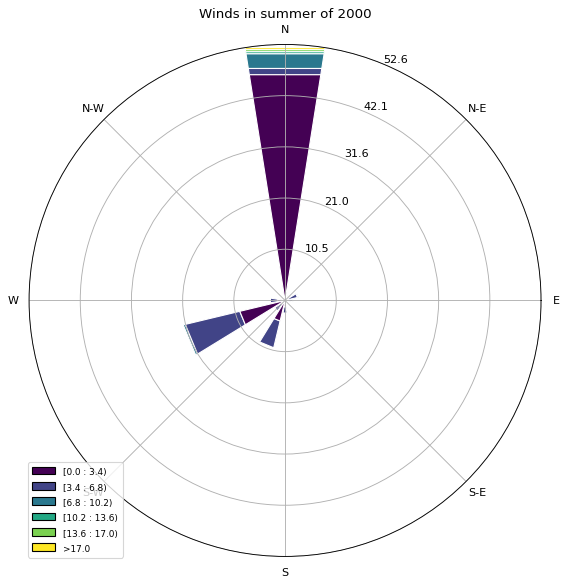

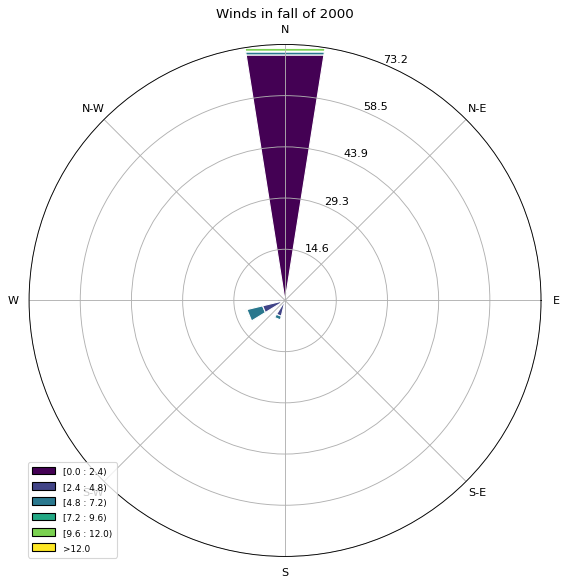

<Figure size 600x600 with 0 Axes>

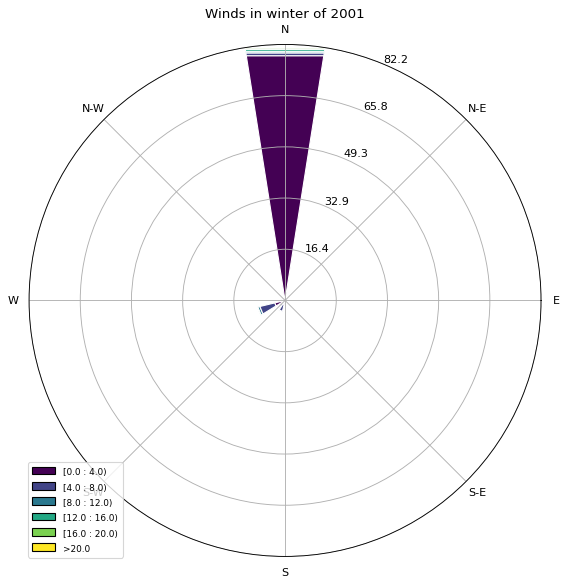

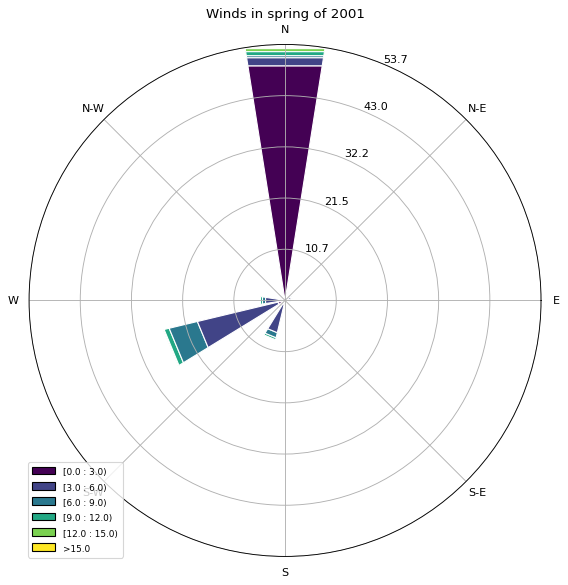

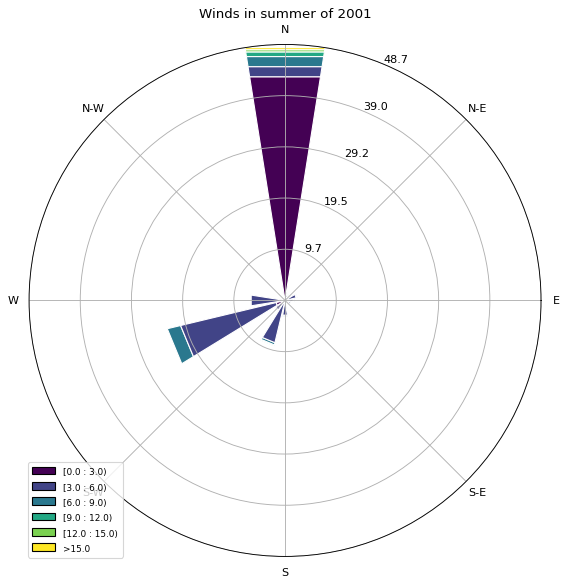

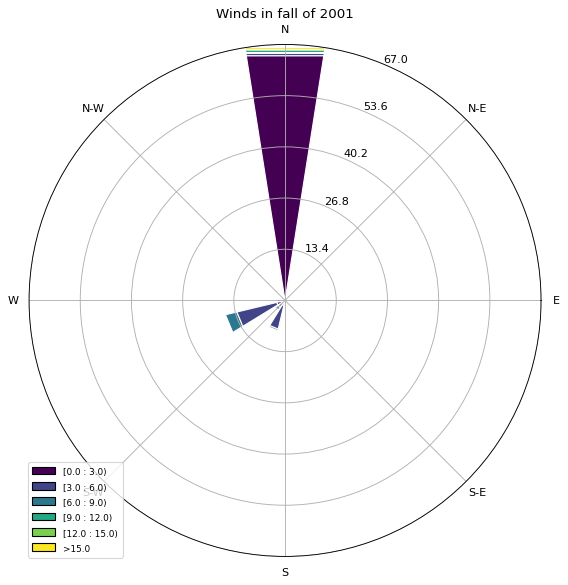

<Figure size 600x600 with 0 Axes>

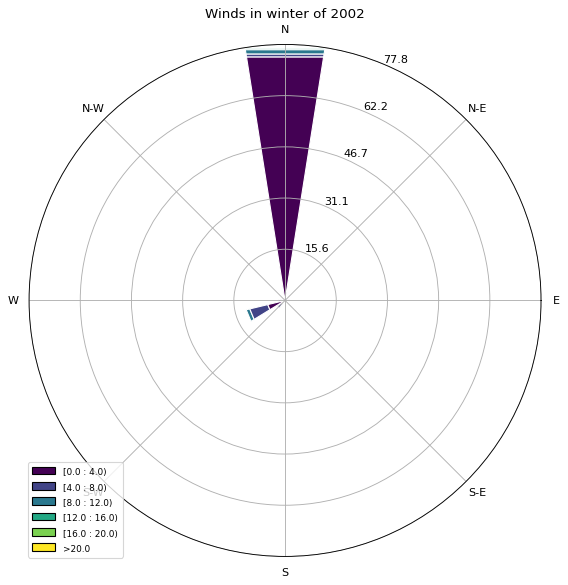

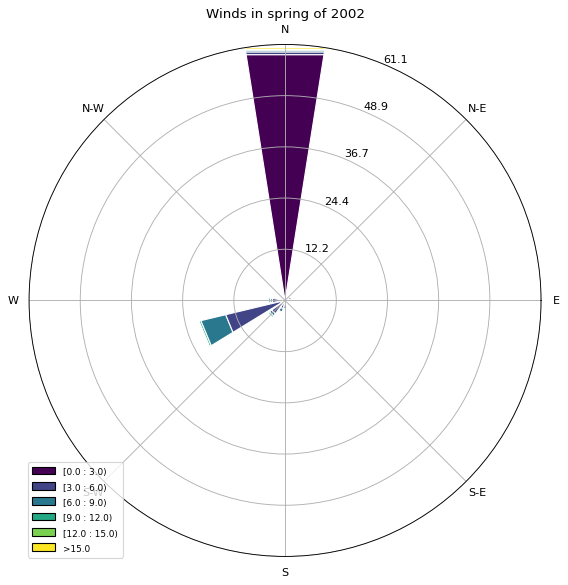

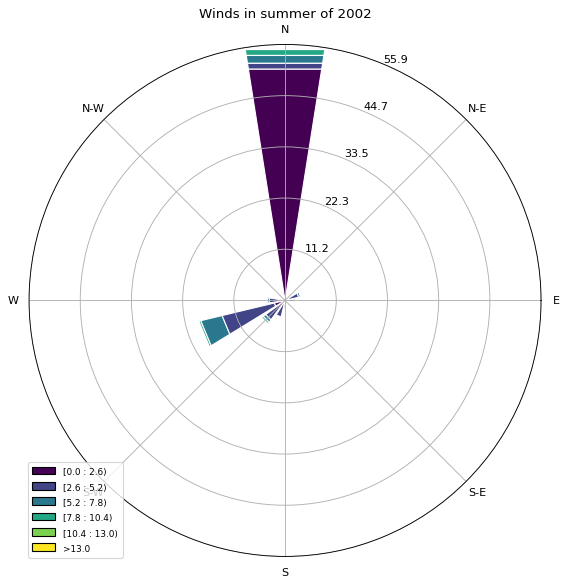

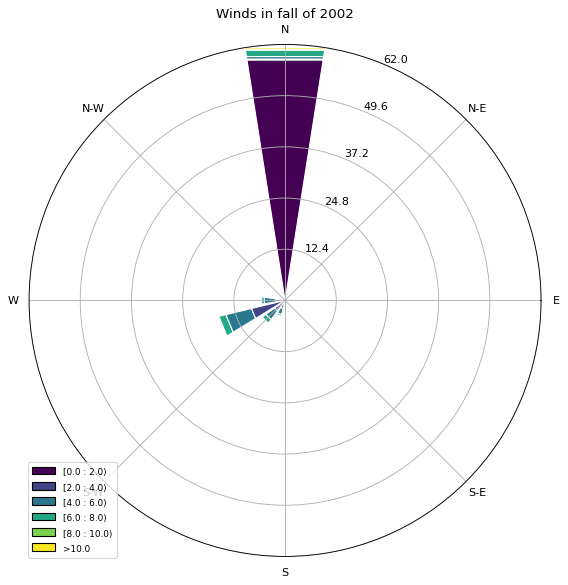

<Figure size 600x600 with 0 Axes>

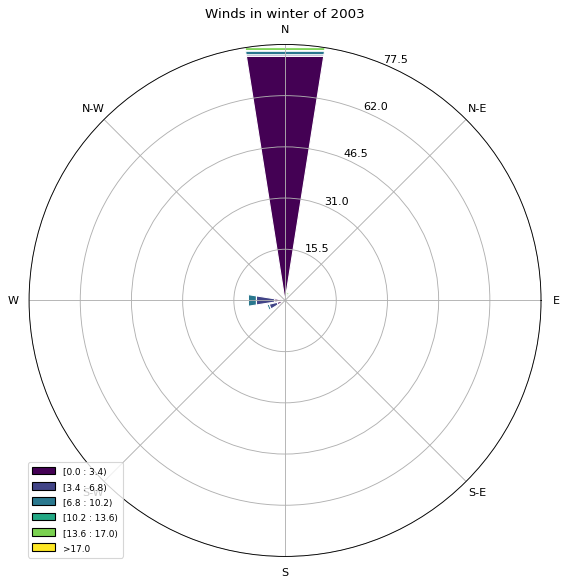

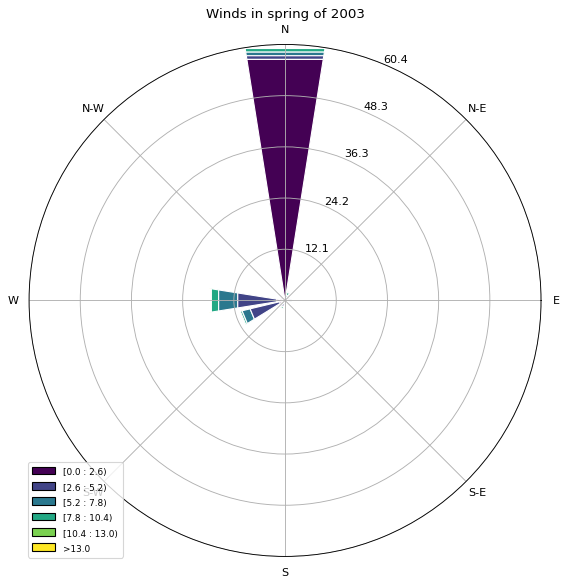

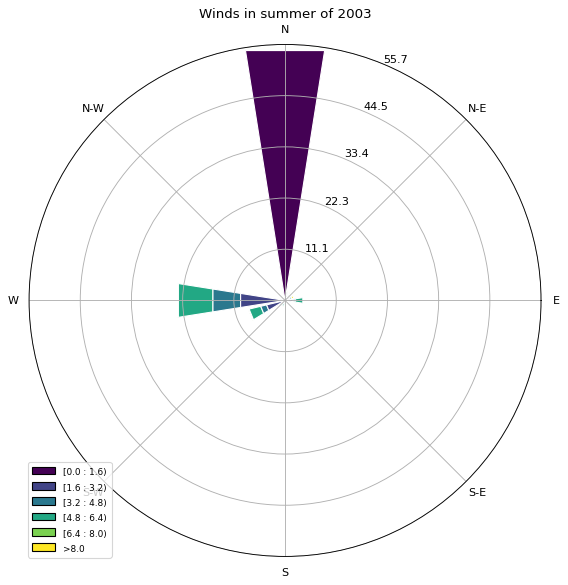

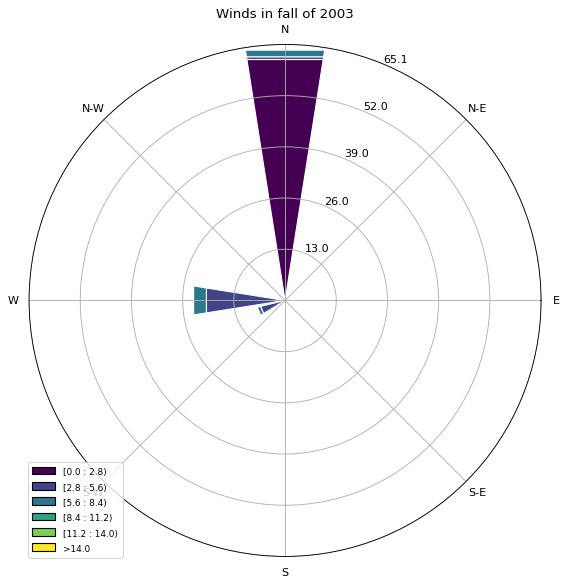

<Figure size 600x600 with 0 Axes>

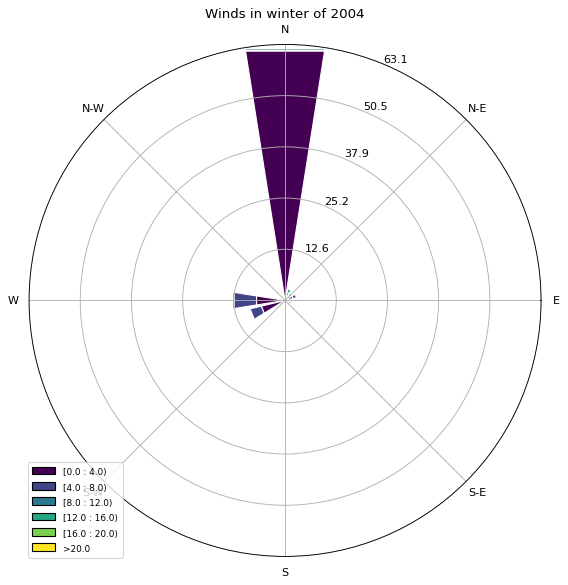

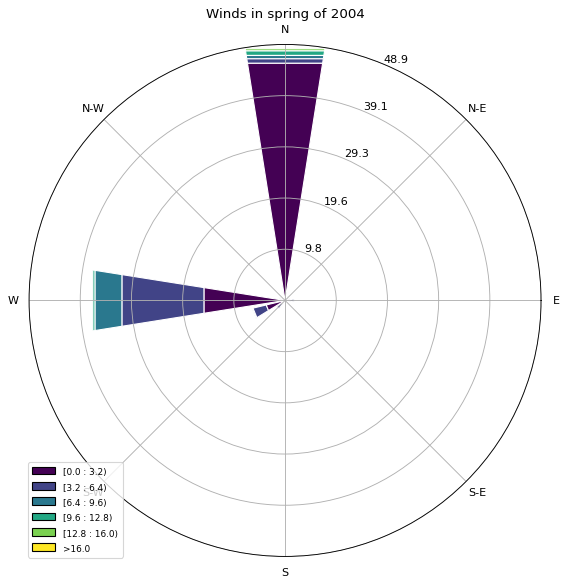

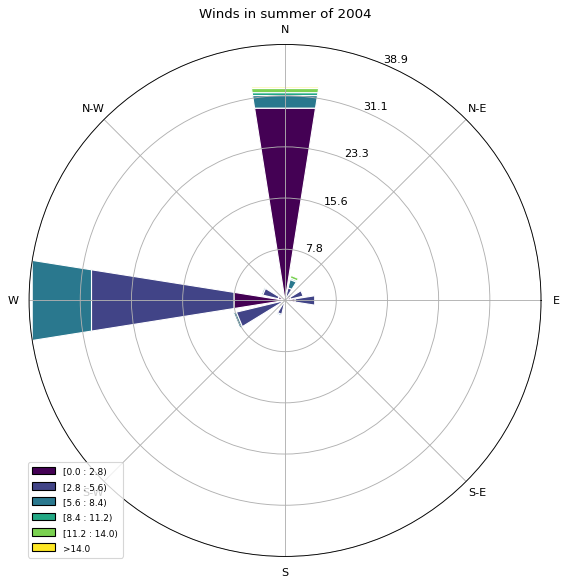

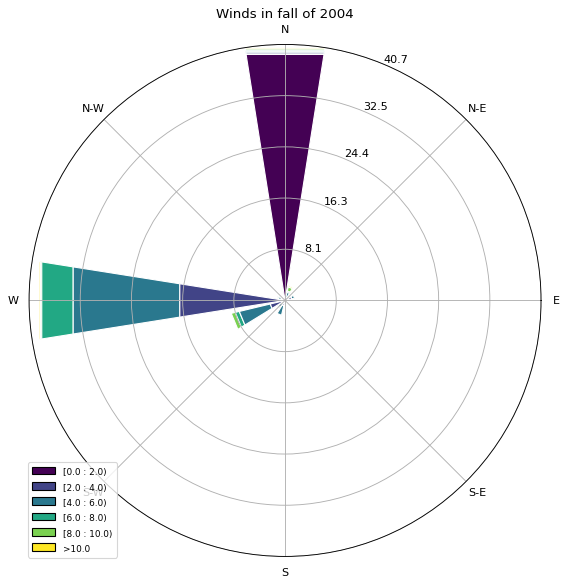

In [10]:
# To plot all the wind-rose diagrams for each season from 1990 to 2004, run the following code.
# Please note that this may take some time.
seasons = ['winter', 'spring', 'summer', 'fall']
for year in range(1990, 2005):
    if year != 1998:
        df_year = df_wind[df_wind['date'].dt.year ==year]
        plt.figure(dpi=200, figsize=(3,3))
        for season in seasons:

            ax = WindroseAxes.from_ax()
            ax.bar(df_year[df_year['season'] == season]['wind_direction'],
                   df_year[df_year['season'] == season]['wind_speed'], normed=True,
                  opening=0.8, edgecolor='white')
            ax.set_legend()
            plt.title(f'Winds in {season} of {year}')
            plt.savefig(f"plots/{season}_{year}.png")
            plt.show()
            


In [ ]:
len(range(1990, 2005))